K NEAREST NEIGHBOR SOLUTION

In [71]:
# IMPORT
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from src.classifiers import knn

#PLOT SETTINGS
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#AUTO RELOAD MODULES
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
# LOAD RAW CIFAR-10 DATA
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
x_train, y_train, x_test, y_test = load_CIFAR10(cifar10_dir)# Load the raw CIFAR-10 data.

#GRAB BATCH OF TRAINING/TEST DATA
X_train = x_train[:5000]
Y_train = y_train[:5000]
X_test = x_test[:500]
Y_test = y_test[:500]

#RESHAPE DATA TO 2D
X_train = np.reshape(X_train,(X_train.shape[0],-1))
X_test = np.reshape(X_test,(X_test.shape[0],-1))
print x_train.shape,y_train.shape,x_test.shape,y_test.shape

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


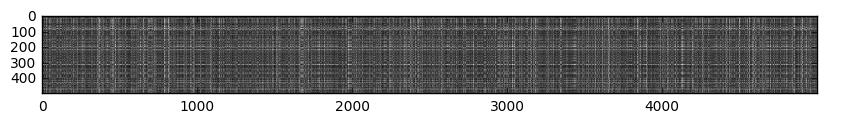

Accuracy: 30.2 percent


In [66]:
#TEST KNN CLASS - VARY K
classifier = knn()
classifier.train(X_train,Y_train)
dist = classifier.distance(X_test)
predict = classifier.predict(dist,k=5)
acc = classifier.accuracy(predict,Y_test)

#PLOT TO LOOK AT DATA
plt.imshow(dist, interpolation='none')
plt.show()

#PRINT ACCURACY
print("Accuracy: "+str(acc*100)+" percent")

Note - the columns of white/black occur because training matrix is repeated along that axis 500 times. The solution is ultimately summed along the 3072 axis. 

In [67]:
#CHECK - NOTE: SKIPPED TIMING EXERCISE
dist1 = classifier.distance(X_test)
dist2 = classifier.test(X_test)
if dist1.all()==dist2.all():
    print "Check Passed"
else:
     print "Check Failed" 

(500, 5000) (500, 5000)


In [82]:
#CROSS VALIDATION
folds = 5
interval = int(X_train.shape[0]/float(folds))
ks = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
cross_dict = dict()

#ITERATE THROUGH Ks
for k in ks:
    accuracy = []
    print("--- K: "+str(k))
    for fold in range(folds):
        classifier = knn()
        batch_x = X_train[interval*fold:interval*fold+interval]
        batch_y = Y_train[interval*fold:interval*fold+interval]
        batch_x = np.reshape(batch_x,(batch_x.shape[0],-1))
        classifier.train(batch_x,batch_y)
        distance = classifier.distance(X_test)
        curr_predict = classifier.predict(distance,k=k)
        curr_accuracy = classifier.accuracy(curr_predict,Y_test)
        print("Fold: "+str(fold)+", Accuracy: "+str(curr_accuracy))
        np.append(accuracy,curr_accuracy)
        cross_dict[k] = accuracy    

--- K: 1
Fold: 0, Accuracy: 0.258
Fold: 1, Accuracy: 0.228
Fold: 2, Accuracy: 0.244
Fold: 3, Accuracy: 0.244
Fold: 4, Accuracy: 0.268
--- K: 3
Fold: 0, Accuracy: 0.262
Fold: 1, Accuracy: 0.232
Fold: 2, Accuracy: 0.244
Fold: 3, Accuracy: 0.23
Fold: 4, Accuracy: 0.234
--- K: 5
Fold: 0, Accuracy: 0.252
Fold: 1, Accuracy: 0.23
Fold: 2, Accuracy: 0.266
Fold: 3, Accuracy: 0.22
Fold: 4, Accuracy: 0.238
--- K: 8
Fold: 0, Accuracy: 0.252
Fold: 1, Accuracy: 0.236
Fold: 2, Accuracy: 0.258
Fold: 3, Accuracy: 0.246
Fold: 4, Accuracy: 0.238
--- K: 10
Fold: 0, Accuracy: 0.23
Fold: 1, Accuracy: 0.238
Fold: 2, Accuracy: 0.246
Fold: 3, Accuracy: 0.242
Fold: 4, Accuracy: 0.248
--- K: 12
Fold: 0, Accuracy: 0.234
Fold: 1, Accuracy: 0.238
Fold: 2, Accuracy: 0.238
Fold: 3, Accuracy: 0.224
Fold: 4, Accuracy: 0.248
--- K: 15
Fold: 0, Accuracy: 0.218
Fold: 1, Accuracy: 0.244
Fold: 2, Accuracy: 0.232
Fold: 3, Accuracy: 0.222
Fold: 4, Accuracy: 0.244
--- K: 20
Fold: 0, Accuracy: 0.224
Fold: 1, Accuracy: 0.244
Fol

SVM SOLUTION

In [227]:
%reset
# IMPORT
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

#PLOT SETTINGS
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#AUTO RELOAD MODULES
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [229]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# Renormalize
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

In [231]:
from src.classifiers import *

# Set SVM classifier
classifier = svm(3073,10)
W = np.random.rand(3073,10)*0.0001

# Compute loss and gradient
loss,grad = classifier.loss(W,X_dev,y_dev,0.00001)
print 'loss: %f, grad total: %f' % (loss,np.min(grad))

loss: 8.914159, grad total: -59.096311


In [232]:
# Check
from cs231n.gradient_check import grad_check_sparse

# Compute the loss and its gradient at W.
loss, grad = classifier.loss(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
f = lambda w: classifier.loss(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = classifier.loss(W, X_dev, y_dev, 1e2)
f = lambda w: classifier.loss(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -8.996256 analytic: -8.996256, relative error: 1.323542e-12
numerical: -2.248429 analytic: -2.248429, relative error: 2.708961e-12
numerical: -12.046970 analytic: -12.046970, relative error: 1.459854e-12
numerical: 24.299443 analytic: 24.299443, relative error: 2.481328e-12
numerical: -19.364549 analytic: -19.364549, relative error: 4.788432e-13
numerical: -2.326202 analytic: -2.326202, relative error: 6.100445e-13
numerical: 21.504959 analytic: 21.504959, relative error: 2.932378e-14
numerical: 2.963308 analytic: 2.963308, relative error: 5.039281e-12
numerical: -13.062166 analytic: -13.062166, relative error: 7.759733e-13
numerical: 22.273859 analytic: 22.273859, relative error: 4.721244e-13
numerical: 2.099585 analytic: 2.099585, relative error: 2.017621e-11
numerical: 1.955199 analytic: 1.955199, relative error: 7.477768e-13
numerical: -14.287734 analytic: -14.287734, relative error: 1.038942e-12
numerical: 18.102922 analytic: 18.102922, relative error: 3.551159e-13
nume

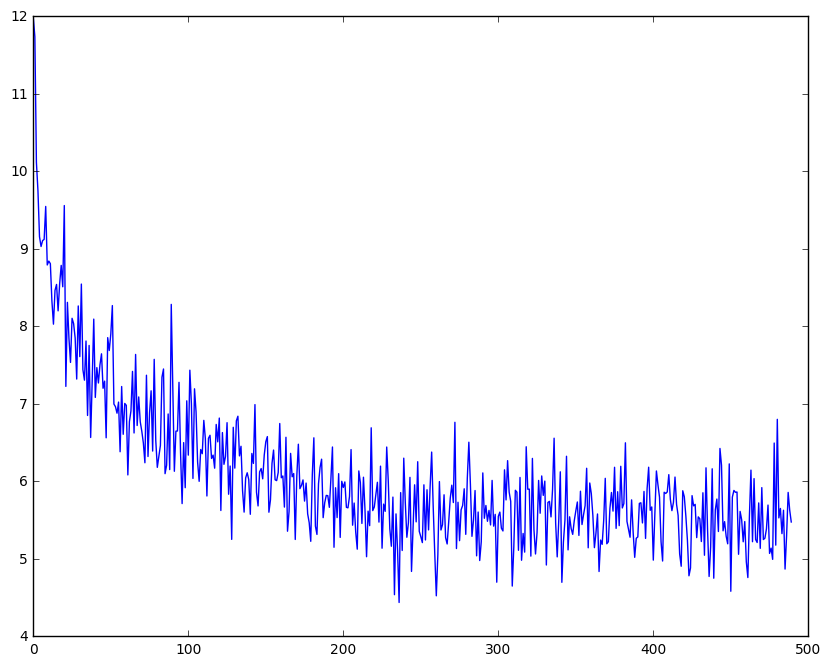

In [233]:
classifier = svm(X_train.shape[1],10)
loss_hist = classifier.train(X_train,y_train,learning_rate=1e-7,reg=57142)
plt.plot(loss_hist)

In [234]:
y_pred = classifier.predict(X_test)
acc = classifier.accuracy(y_pred,y_test)
print("Current Accuracy: "+str(acc*100))

Current Accuracy: 36.4


In [235]:
# HYPERPARAMETER TUNING
from src.classifiers import svm

# SET UP CLASSIFIER
classifier = svm(X_train.shape[1],10)
learning_rates = np.linspace(1e-8, 5e-6,8)
regularization = np.linspace(5e4,1e5,8)
learn_array = []
reg_array = []

# INVESTIGATE LEARNING RATES
for learn in learning_rates:
    losses = classifier.train(X_train,y_train,learning_rate=learn,batch_size=100)
    y_pred = classifier.predict(X_test)
    acc = classifier.accuracy(y_pred,y_test)
    learn_array.append(acc)
    
# INVESTIGATE REGULARIZATION
for reg in regularization:
    losses = classifier.train(X_train,y_train,reg=reg,batch_size=100)
    y_pred = classifier.predict(X_test)
    acc = classifier.accuracy(y_pred,y_test)
    reg_array.append(acc)

# PRINT RESULTS
print("Optimal Learning Rate: "+str(learning_rates[np.argmax(learn_array)]))
print("Optimal Regularization: "+str(regularization[np.argmax(reg_array)]))

Optimal Learning Rate: 1e-08
Optimal Regularization: 50000.0


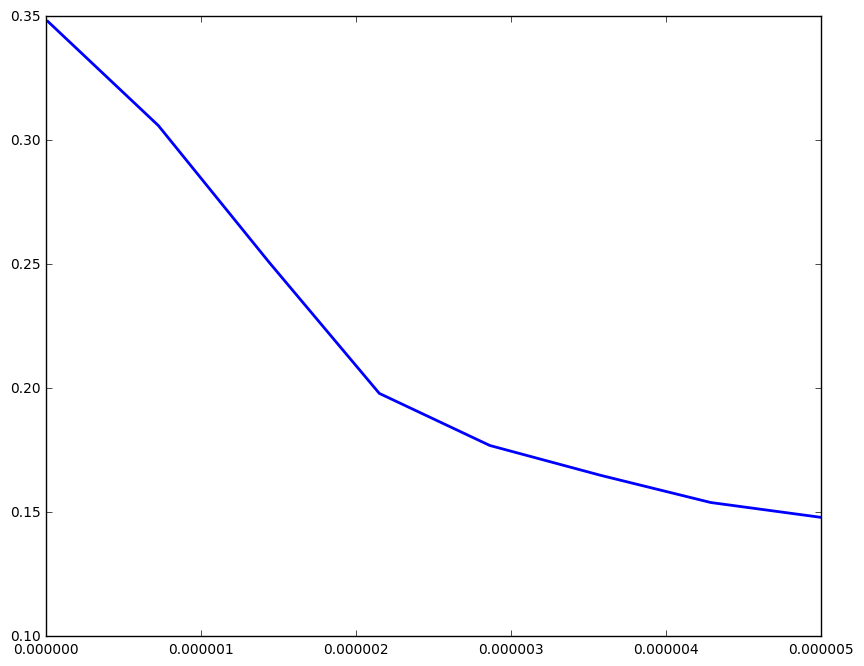

In [236]:
plt.plot(learning_rates,learn_array,linewidth=2.0)

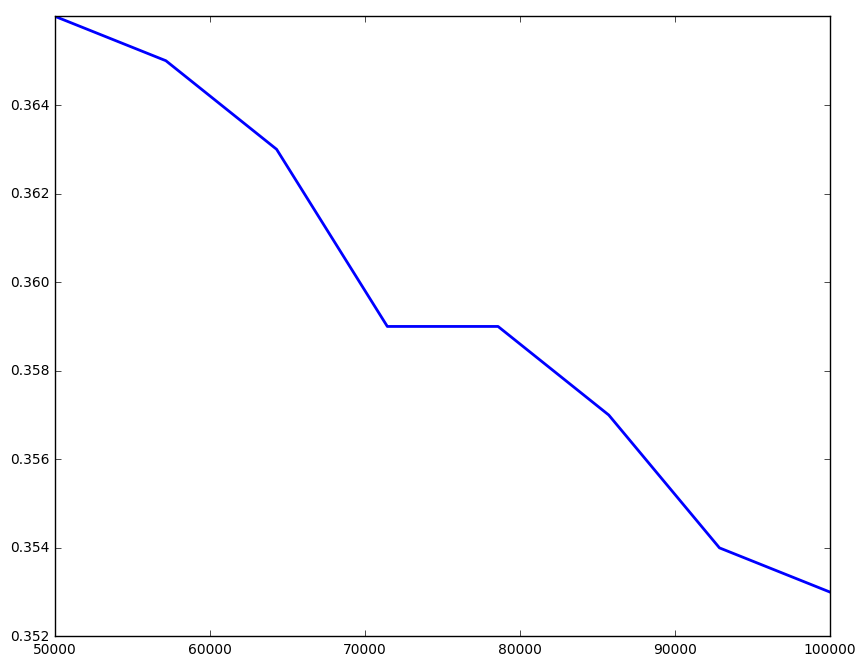

In [237]:
plt.plot(regularization,reg_array,linewidth=2.0)

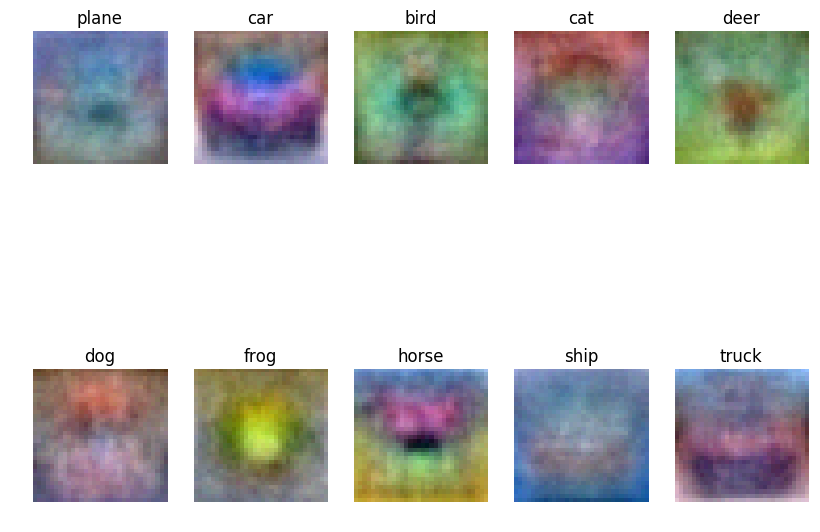

In [238]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
best_svm = svm(X_train.shape[1],10)
loss = best_svm.train(X_train,y_train)
w = best_svm.model[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])

SOFTMAX SOLUTION

In [239]:
%reset
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.  
  """
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  mask = np.random.choice(num_training, num_dev, replace=False)
  X_dev = X_train[mask]
  y_dev = y_train[mask]
  
  # Preprocessing: reshape the image data into rows
  X_train = np.reshape(X_train, (X_train.shape[0], -1))
  X_val = np.reshape(X_val, (X_val.shape[0], -1))
  X_test = np.reshape(X_test, (X_test.shape[0], -1))
  X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
  
  # Normalize the data: subtract the mean image
  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image
  X_dev -= mean_image
  
  # add bias dimension and transform into columns
  X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
  X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
  X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
  X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
  
  return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()

In [241]:
# IMPORT CLASSIFIER
from src.classifiers import softmax

# INITIALIZE CLASSIFIER
length = X_train.shape[1]
classifier = softmax(length,10)

# GRADIENT AND LOSS CHECK
W = np.random.randn(3073, 10) * 0.0001
loss, grad = classifier.cross_entropy_loss(W, X_dev, y_dev, 0.0,grad="batch")
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

loss: 2.339532
sanity check: 2.302585


In [242]:
# IMPORT GRAD CHECK
from cs231n.gradient_check import grad_check_sparse

# WITHOUT REGULARIZATION
loss, grad = classifier.cross_entropy_loss(W, X_dev, y_dev, 0.0,grad='batch')
f = lambda w: classifier.cross_entropy_loss(w, X_dev, y_dev, 0.0,grad='batch')[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# WITH REGULARIZATION
loss, grad = classifier.cross_entropy_loss(W, X_dev, y_dev, 1e2,grad='batch')
f = lambda w: classifier.cross_entropy_loss(w, X_dev, y_dev, 1e2,grad='batch')[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.796666 analytic: -0.796666, relative error: 1.341796e-08
numerical: 0.113030 analytic: 0.113030, relative error: 2.195850e-07
numerical: -1.330751 analytic: -1.330751, relative error: 7.341048e-09
numerical: -1.016850 analytic: -1.016850, relative error: 6.463306e-09
numerical: 3.703617 analytic: 3.703617, relative error: 3.043998e-09
numerical: -0.583781 analytic: -0.583781, relative error: 5.098357e-09
numerical: 2.101864 analytic: 2.101863, relative error: 1.922843e-08
numerical: -1.582203 analytic: -1.582203, relative error: 2.057061e-08
numerical: -0.836589 analytic: -0.836589, relative error: 5.121099e-09
numerical: -3.672173 analytic: -3.672173, relative error: 9.080060e-09
numerical: 4.808100 analytic: 4.808100, relative error: 6.617300e-09
numerical: 0.004860 analytic: 0.004860, relative error: 2.936027e-06
numerical: 1.114579 analytic: 1.114579, relative error: 1.416279e-08
numerical: -1.212611 analytic: -1.212611, relative error: 3.227152e-08
numerical: -1.2692

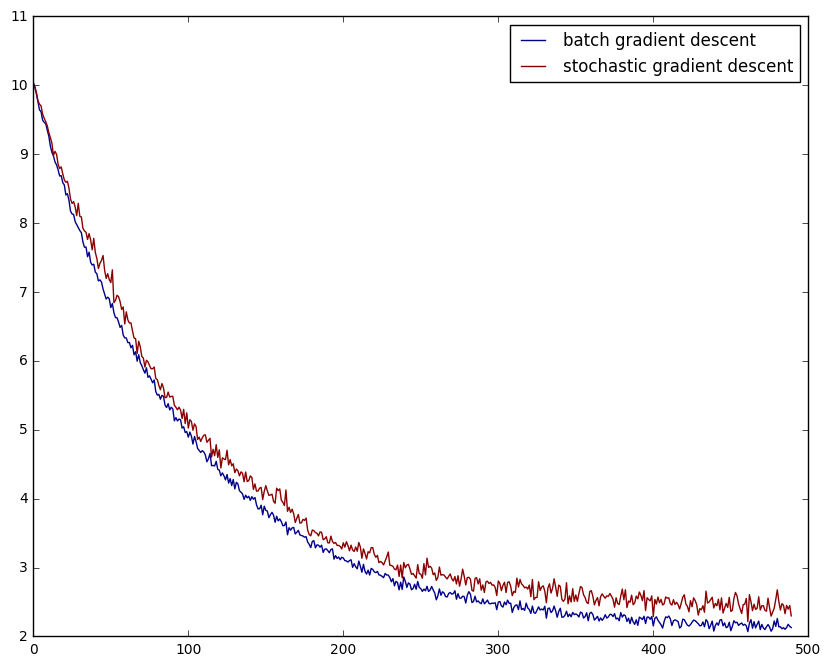

In [246]:
loss_hist = classifier.train(X_train,y_train)
loss_hist_stochastic = classifier.train(X_train,y_train,grad="stochastic")
xvals = np.arange(len(loss_hist))
plt.plot(xvals,loss_hist,color="darkblue",label="batch gradient descent")
plt.plot(xvals,loss_hist_stochastic,color="darkred",label="stochastic gradient descent")
plt.legend()

In [247]:
learning_rates = np.linspace(1e-8, 5e-6,8)
regularization = np.linspace(5e4,1e5,8)
learn_array = []
reg_array = []

# INVESTIGATE LEARNING RATES
for learn in learning_rates:
    losses = classifier.train(X_train,y_train,learning_rate=learn,batch_size=100)
    y_pred = classifier.predict(X_test)
    acc = classifier.accuracy(y_pred,y_test)
    learn_array.append(acc)
    
# INVESTIGATE REGULARIZATION
for reg in regularization:
    losses = classifier.train(X_train,y_train,reg=reg,batch_size=100)
    y_pred = classifier.predict(X_test)
    acc = classifier.accuracy(y_pred,y_test)
    reg_array.append(acc)

# PRINT RESULTS
print("Optimal Learning Rate: "+str(learning_rates[np.argmax(learn_array)]))
print("Optimal Regularization: "+str(regularization[np.argmax(reg_array)]))

Optimal Learning Rate: 7.22857142857e-07
Optimal Regularization: 50000.0


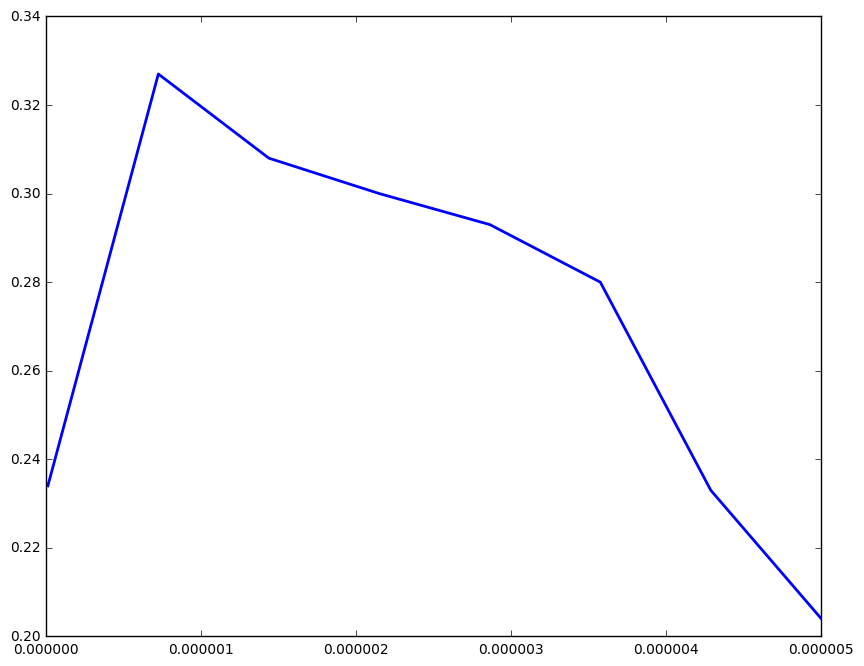

In [248]:
plt.plot(learning_rates,learn_array,linewidth=2.0)

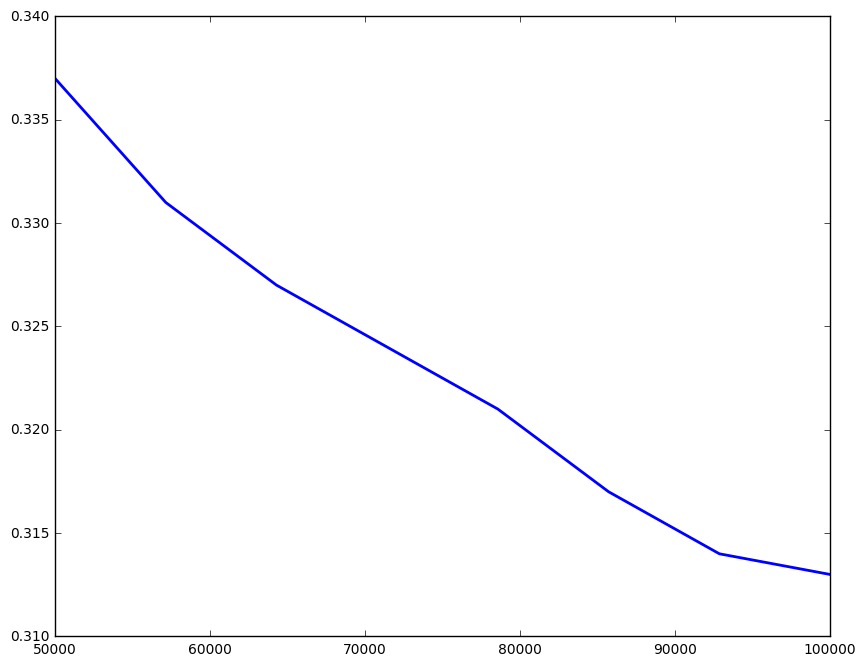

In [224]:
plt.plot(regularization,reg_array,linewidth=2.0)

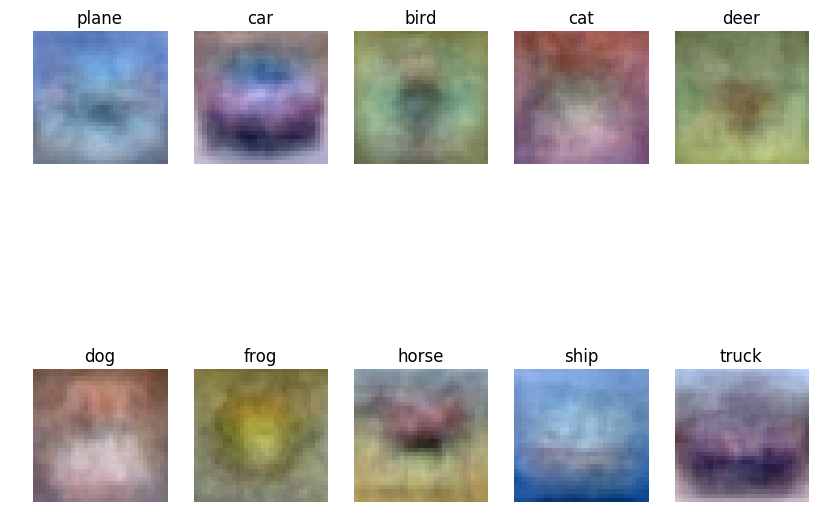

In [225]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
best_softmax = softmax(length,10)
loss = best_softmax.train(X_train,y_train,learning_rate=7.22857142857e-07)
w = best_softmax.model[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])

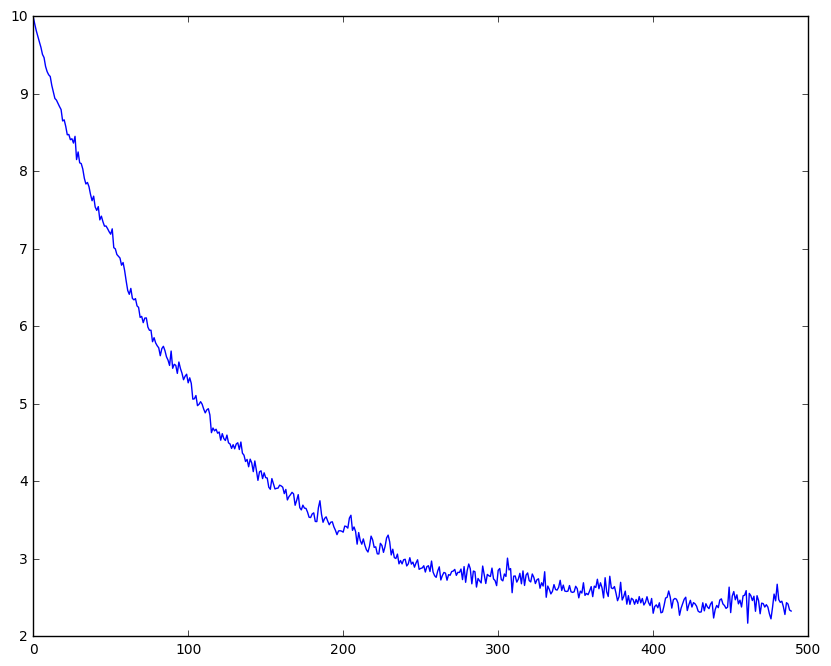

In [226]:
#CHECK STOCHASTIC
stochastic = softmax(length,10)
loss_hist = stochastic.train(X_train,y_train,grad="stochastic",batch_size=100)
plt.plot(loss_hist)

In [206]:
#SVM CHECK
from src.classifiers import svm

svm_model = svm(length,10)
W = np.random.randn(length,10)
Xtr = X_train
Ytr = y_train
new_reg = 5e4
loss_hist = svm_model.loss(W,Xtr,Ytr,new_reg)